## Part 1: Predict the price of a house

### Problem statement :-
The goal is to understand the relationship between house features and how these
variables affect the house price.

Dataset Link: https://www.dropbox.com/sh/aypq6h3254207bs/AACzMLvo-XtK9sYAAma6FW0la?dl=0

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read The Dataset
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


#### Exploratory Data Analysis and Preprocessing

In [4]:
# Shape of Dataset - 414 rows and 9 columns.
df.shape

(414, 9)

In [5]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [6]:
# Dropping the unnecessary columns - Transaction date
df.drop("Transaction date",inplace=True,axis=1)

In [7]:
# Description of data
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
# Checking for null values - no null values
df.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [9]:
# correlation of dependent column
df.corr()["House price of unit area"]

House Age                                  -0.210567
Distance from nearest Metro station (km)   -0.673613
Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Number of bedrooms                          0.050265
House size (sqft)                           0.046489
House price of unit area                    1.000000
Name: House price of unit area, dtype: float64

In [10]:
# Top 5 rows
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [11]:
# User defined function to convert House Age which is in years to convert into months.
import math
def age(x):
    h_age = math.modf(x)
    return h_age[1]*12+h_age[0]*10

In [12]:
# Applying map function to create new age column of months
df["House_Age_Months"]=df["House Age"].map(age)

In [13]:
# Top 5 rows
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House_Age_Months
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,384.0
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,233.0
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,159.0
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,159.0
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,60.0


In [14]:
# Dropping the House Age column which is in Years.
df.drop("House Age",inplace=True,axis=1)

In [15]:
# Top 5 rows.
df.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,House_Age_Months
0,84.87882,10,24.98298,121.54024,1,575,37.9,384.0
1,306.59470,9,24.98034,121.53951,2,1240,42.2,233.0
2,561.98450,5,24.98746,121.54391,3,1060,47.3,159.0
3,561.98450,5,24.98746,121.54391,2,875,54.8,159.0
4,390.56840,5,24.97937,121.54245,1,491,43.1,60.0


#### Univariate Analysis using histogram/ Multivariate analysis using Scatterplot

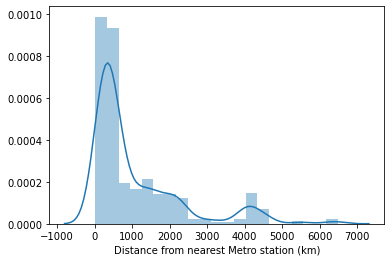

In [16]:
# Distribution plot of Distance from nearest Metro station (km)
sns.distplot(df["Distance from nearest Metro station (km)"])

###### C - Most of the data points lie between 0-2000km

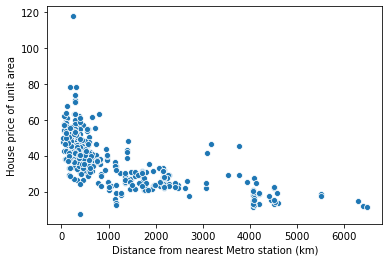

In [17]:
# Scatter plot between Distance from nearest Metro station (km) and House price of unit area.
sns.scatterplot(df["Distance from nearest Metro station (km)"],df["House price of unit area"])

###### C-The datapoint which is at the left top corner & right bottom corner look like outliers

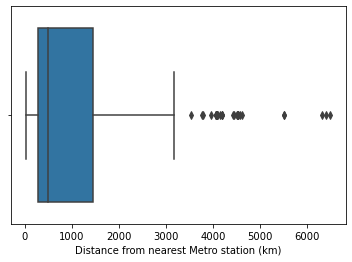

In [18]:
# Boxplot of Distance from nearest Metro station (km)
sns.boxplot(df["Distance from nearest Metro station (km)"])

In [19]:
# Detect outliers
Q1 = np.percentile(df["Distance from nearest Metro station (km)"], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df["Distance from nearest Metro station (km)"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

lower_fence = Q1-(3*(IQR))
upper_fence = Q3+(3*(IQR))

In [20]:
lower_fence,upper_fence

(-3200.9808, 4943.0656)

###### C- Anything lower than -3200 and Greater than 5000 is outlier

In [21]:
# Removing the outliers
outliers=np.where(df["Distance from nearest Metro station (km)"]>5000)

df.drop(outliers[0],inplace=True)

In [22]:
# new shape of dataset
df.shape

(409, 8)

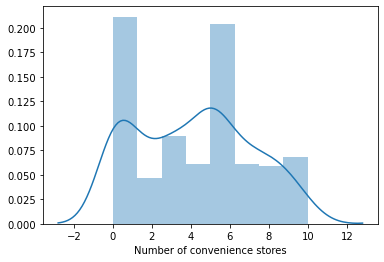

In [23]:
# Distribution plot of Number of convenience stores.
sns.distplot(df["Number of convenience stores"])

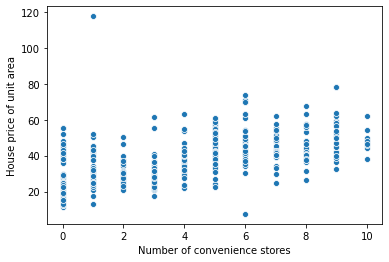

In [24]:
# Scatter plot between Number of convenience stores & House price of unit area
sns.scatterplot(df["Number of convenience stores"],df["House price of unit area"])

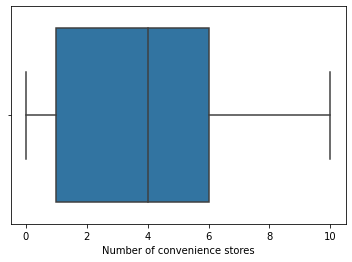

In [25]:
# Boxplot of Number of convenience stores
sns.boxplot(df["Number of convenience stores"])

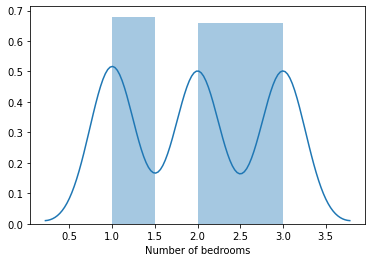

In [26]:
# Distributin plot of Number of bedrooms
sns.distplot(df["Number of bedrooms"])

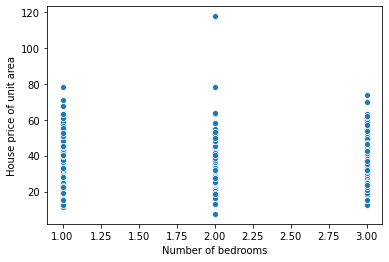

In [27]:
# Scatter plot between Number of bedrooms & House price of unit area
sns.scatterplot(df["Number of bedrooms"],df["House price of unit area"])

###### C- There are 3 unique no of bedrooms 1,2,3.

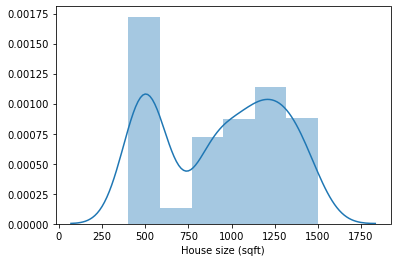

In [28]:
# Distribution plot of House size (sqft).
sns.distplot(df["House size (sqft)"])

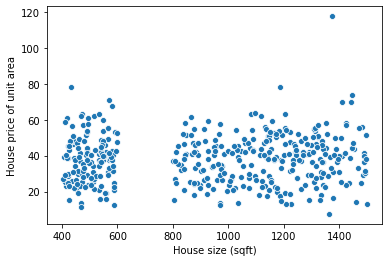

In [29]:
# Scatter plot between House size (sqft) & House price of unit area.
sns.scatterplot(df["House size (sqft)"],df["House price of unit area"])

###### C- Zero datapoints between 600sqft-800sqft house size. 

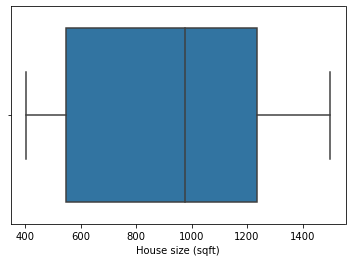

In [30]:
# Boxplot of House size (sqft).
sns.boxplot(df["House size (sqft)"])

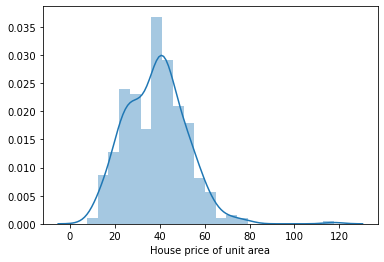

In [31]:
# Distribution plot of House price of unit area
sns.distplot(df["House price of unit area"])

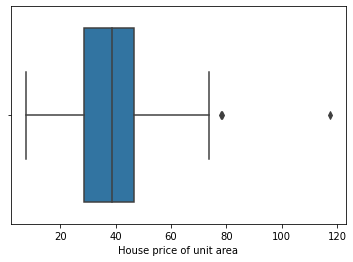

In [32]:
# Boxplot of House price of unit area
sns.boxplot(df["House price of unit area"])

In [33]:
# Detect outliers
Q1 = np.percentile(df["House price of unit area"], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df["House price of unit area"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

lower_fence = Q1-(3*(IQR))
upper_fence = Q3+(3*(IQR))

In [34]:
lower_fence,upper_fence

(-26.20000000000001, 101.20000000000002)

###### C- Anything lower than -26 and Greater than 100 is outlier

In [35]:
# Removing the outliers.
outliers=np.where(df["House price of unit area"]>100)

df.drop(outliers[0],inplace=True)

In [36]:
# New shape of data
df.shape

(408, 8)

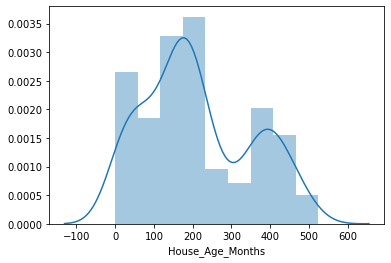

In [37]:
# Distribution plot of House_Age_Months
sns.distplot(df["House_Age_Months"])

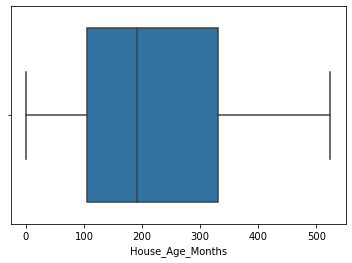

In [38]:
# Boxplot of House_Age_Months
sns.boxplot(df["House_Age_Months"])

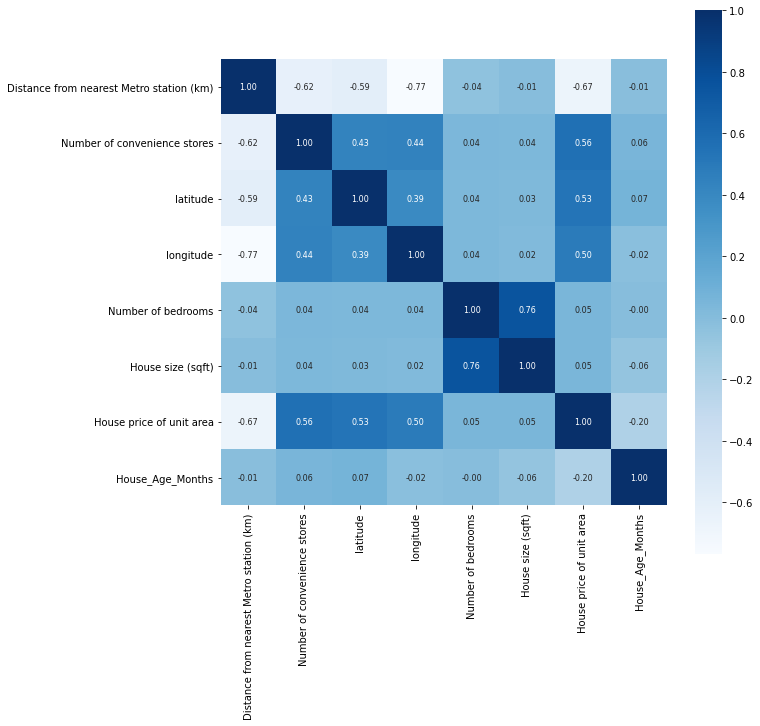

In [39]:
# Correlation Metrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

###### C- From the above correlation metrix, we get that the dependent feature which is house price of unit area is positively correlated with no of convenience stores,altitude,longitude and negatively correlated with distance from nearest metro station, age of house

In [40]:
# Dropping the Number of bedrooms column becoz there is multicollinearity between Number of bedrooms and House size.
df.drop(["Number of bedrooms"],inplace=True,axis=1)

In [41]:
# Top 5 rows
df.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),House price of unit area,House_Age_Months
0,84.87882,10,24.98298,121.54024,575,37.9,384.0
1,306.59470,9,24.98034,121.53951,1240,42.2,233.0
2,561.98450,5,24.98746,121.54391,1060,47.3,159.0
3,561.98450,5,24.98746,121.54391,875,54.8,159.0
4,390.56840,5,24.97937,121.54245,491,43.1,60.0


#### Model Creation and Evaluation

In [42]:
# Splitting the independent and dependent features.
x = df.drop("House price of unit area",axis=1)
y = df["House price of unit area"]

In [43]:
# Top 5 rows in independent features.
x.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),House_Age_Months
0,84.87882,10,24.98298,121.54024,575,384.0
1,306.59470,9,24.98034,121.53951,1240,233.0
2,561.98450,5,24.98746,121.54391,1060,159.0
3,561.98450,5,24.98746,121.54391,875,159.0
4,390.56840,5,24.97937,121.54245,491,60.0


In [44]:
# Top 5 values in dependent feature.
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [45]:
# Shape of x and y
print(x.shape)
print(y.shape)

(408, 6)
(408,)


In [46]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

x_train.shape, x_test.shape

((326, 6), (82, 6))

###### C- Here i select random state=56 by which gives max R2 score for liner regression model

In [47]:
# scores=[]
# for i in range(1000):
#     x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
#     lr1=LinearRegression()
#     lr1.fit(x_train,y_train)
#     y_pred=lr1.predict(x_test)
#     scores.append(r2_score(y_test,y_pred))
# max(scores)
# np.argmax(scores)

#### Feature Scaling - Standardization:Scale Down the data where mean=0 and standard deviation=1

In [48]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

In [49]:
# Object creation of standardscaler
scaling=StandardScaler()

In [50]:
# Fitting the x_train
scaling.fit(x_train)

StandardScaler()

In [51]:
# Transformation of x_train and x_test
x_train_scaled = scaling.transform(x_train)
x_test_scaled = scaling.transform(x_test)

In [52]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [53]:
# Top 5 rows of scaled data
x_train_scaled.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House size (sqft),House_Age_Months
0,-0.761401,0.326498,-0.313318,0.449411,0.166063,1.984406
1,1.327724,-0.027118,-0.753907,-1.670337,1.121229,0.228013
2,1.035263,-0.380733,-0.592695,-1.501041,-1.039402,-1.203122
3,-0.559055,0.326498,0.789844,0.605191,-1.361627,-0.567062
4,-0.528221,1.387345,0.494429,0.369031,1.339882,1.261610


In [54]:
# linear Regression - Baseline Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred,y_test))
print("MAE",mean_absolute_error(y_pred,y_test))

R2 score 0.7342372149196704
MAE 5.030595884243011


###### C- Linear regression is baseline model, so the minimum R2 score is 73.4%

In [55]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=3)
ridge.fit(x_train_scaled,y_train)
y_pred1 = ridge.predict(x_test_scaled)

print("R2 score",r2_score(y_pred1,y_test))
print("MAE",mean_absolute_error(y_pred1,y_test))

R2 score 0.7307355753586735
MAE 5.03008803759793


###### C- Linear Regression is performing well bcoz here all the featuers are important if there is overfitting, then we should use ridge or lasso,but here we already eliminate the multicolinearity.

In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=40,random_state=1)
dt.fit(x_train_scaled,y_train)
y_pred1 = dt.predict(x_test_scaled)

print("R2 score",r2_score(y_pred1,y_test))
print("MAE",mean_absolute_error(y_pred1,y_test))

R2 score 0.7433844204636244
MAE 5.562195121951219


###### C- The decision tree performing well ( R2 score increase by 1%)  bcoz, linear regression perform well on only linear data, and in decision tree there is no linearity required

In [57]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_scaled,y_train)
y_pred3 = knn.predict(x_test_scaled)

print("R2 score",r2_score(y_pred3,y_test))
print("MAE",mean_absolute_error(y_pred3,y_test))

R2 score 0.7416656345428521
MAE 5.122764227642277


###### C- At n_neighbors=3 we get maximum R2 score, which is less than decision tree.

In [58]:
# Support vector machine- regression
from sklearn.svm import SVR
svr=SVR(kernel="rbf",C=10,epsilon=0.1)
svr.fit(x_train_scaled,y_train)
y_pred5 = svr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred5,y_test))
print("MAE",mean_absolute_error(y_pred5,y_test))

R2 score 0.7636957290233067
MAE 4.549165870891757


###### C- SVR is performing better than decision tree,(R2 score is increased by 2%) with rbf kernel,regularization parameter C=10,epsilon which is the margin os tolerence is 0.1

In [60]:
# Random Forest - Bagging technique
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50, random_state=2)
rfr.fit(x_train_scaled,y_train)
y_pred2 = rfr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred2,y_test))
print("MAE",mean_absolute_error(y_pred2,y_test))

R2 score 0.7979651912591307
MAE 4.524487804878048


###### C - Random Forest is outperforming with SVR and Decision tree (R2 score is inhance by 3%), bcoz the decision tree model gives high importance to a particular set of features. But the random forest chooses features randomly during the training process.Therefore, it does not depend highly on any specific set of features.

#### Hyperparameter tuning of Random forest

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {'n_estimators': [20,60,100,120], 
              'max_features': [0.2,0.6,1.0],
              'max_depth': [2,8,None],
             'max_samples' : [0.5,0.75,1.0],
             'random_state':[2,3,4,5,6,7]}

In [63]:
grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True)

In [64]:
grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120],
                         'random_state': [2, 3, 4, 5, 6, 7]})

In [65]:
grid.best_params_

{'max_depth': 8,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 120,
 'random_state': 6}

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=120, random_state=6,max_depth=8,max_features=0.6,max_samples=1.0)
rfr.fit(x_train_scaled,y_train)
y_pred2 = rfr.predict(x_test_scaled)

print("R2 score",r2_score(y_pred2,y_test))
print("MAE",mean_absolute_error(y_pred2,y_test))

R2 score 0.7995078073601123
MAE 4.147281916136069


###### C- Finally we get final model (RandomForestRegressor) with 80% R2 score and MAE - 4.14 (House price of unit area) 